## EDA

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import os 
import numpy as np 
sns.set_style("whitegrid")


In [4]:
# grab our dataset(s)
os.chdir("/Users/jabras/rent_scrape/data/")
df = pd.read_csv('tokyo.csv', sep = ',')
df_2 = pd.read_csv('tokyo_2.csv', sep = ',')

# append the datasets 
test = pd.concat([df, df_2], axis = 0)

In [5]:
test.head()

,rent_price,address,sqr_m,name_place,rei_price,shikikin,maintenence_price,nearest_eki,apartment_type,year_built,ku_name,floor,house_type,Lat,Lon
0,13万円,東京都中野区中野２,25.1m2,ＪＲ中央線 中野駅 8階建 築1年,-,13万円,10000円,ＪＲ中央線/中野駅 歩5分,2K,築1年,東京都中野区中野２,8階建\n,賃貸マンション,NaN,NaN
1,17万円,東京都中野区新井１,46.07m2,西武新宿線 新井薬師前駅 2階建 築13年,17万円,17万円,3000円,西武新宿線/新井薬師前駅 歩8分,2K,築13年,東京都中野区新井１,\n2階建\n,賃貸アパート,NaN,NaN
2,11万円,東京都目黒区碑文谷２,35.05m2,東急東横線 学芸大学駅 3階建 築30年,11万円,11万円,-,東急東横線/学芸大学駅 歩12分,2K,築30年,東京都目黒区碑文谷２,\n3階建\n,賃貸マンション,NaN,NaN
3,8.7万円,東京都文京区本駒込５,30m2,正太駒込マンション,8.7万円,8.7万円,3000円,ＪＲ山手線/駒込駅 歩6分,2K,築53年,東京都文京区本駒込５,\n12階建\n,賃貸マンション,NaN,NaN
4,7.9万円,東京都中野区中央３,30.62m2,水上アパート,7.9万円,7.9万円,3000円,東京メトロ丸ノ内線/新中野駅 歩8分,2K,築37年,東京都中野区中央３,\n2階建\n,賃貸アパート,NaN,NaN


In [7]:
test.maintenence_price.unique()

array(['10000円', '3000円', '-', '8000円', '6000円', '2000円', '4000円',
       '5000円', '12000円', '8100円', '5800円', '7000円', '4500円', '16000円',
       '8500円', '15000円', '3500円', '11000円', '9000円', '6400円'],
      dtype=object)

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1150 entries, 0 to 699
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rent_price         1150 non-null   object 
 1   address            1150 non-null   object 
 2   sqr_m              1150 non-null   object 
 3   name_place         1150 non-null   object 
 4   rei_price          1150 non-null   object 
 5   shikikin           1150 non-null   object 
 6   maintenence_price  1150 non-null   object 
 7   nearest_eki        1150 non-null   object 
 8   apartment_type     1150 non-null   object 
 9   year_built         1150 non-null   object 
 10  ku_name            1150 non-null   object 
 11  floor              1150 non-null   object 
 12  house_type         1150 non-null   object 
 13  Lat                0 non-null      float64
 14  Lon                0 non-null      float64
dtypes: float64(2), object(13)
memory usage: 143.8+ KB


In [4]:
# drop lat and lon 
test = df.drop(columns = ['Lat', 'Lon'], axis = 1)

In [6]:
# apartment type and number of each type 
test.apartment_type.value_counts()

1LDK     355
1DK      317
1K       180
2K       136
2DK      116
1SLDK     28
2SK        9
2SDK       9
Name: apartment_type, dtype: int64

In [20]:
# remove manen
test.rent_price = test.rent_price.str.split('万円').str[0]

In [23]:
# remove m2 from square meters
test.sqr_m = test.sqr_m.str.split('m2').str[0]

In [24]:
# make square meters a numeric 
test.sqr_m = pd.to_numeric(test.sqr_m)

In [21]:
# make rent_price numeric 
test.rent_price = pd.to_numeric(test.rent_price)

<AxesSubplot:xlabel='apartment_type', ylabel='rent_price'>

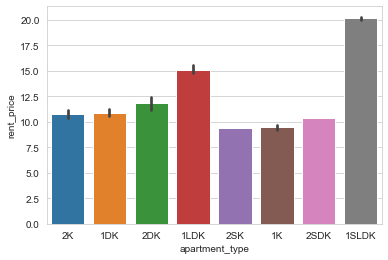

In [20]:
# graph apartment type by rent_price 
sns.barplot(x = test.apartment_type, y = test.rent_price, data = test)

In [16]:
# fix ku name 
test.ku_name = test.ku_name.str.split('東京都').str[1]
test.ku_name = test.ku_name.str.split('区').str[0]

<AxesSubplot:xlabel='ku_name', ylabel='rent_price'>

/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 37326 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30446 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 40658 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25991 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20140 missing from current font.
  font.set_

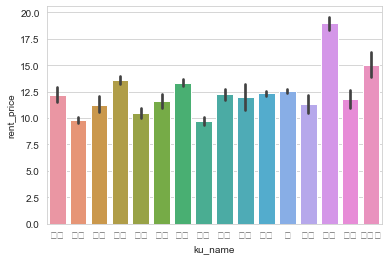

In [22]:
# graph rent_price by ku name 
sns.barplot(x = test.ku_name, y = test.rent_price, data = test)

In [ ]:
# graph rent_price by closeness to eki 


In [26]:
# graph sqr meeters by rent_price - will still need to adjust rent_price's values 
#sns.lmplot(x = test.rent_price, y = test.sqr_m, data = test)

## Analysis

In [ ]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf

In [ ]:
# spatial analysis in python - https://pypi.org/project/pysal/

# https://www.statsmodels.org/stable/examples/notebooks/generated/kernel_density.html
# https://geographicdata.science/book/notebooks/08_point_pattern_analysis.html
# 